# Bike Sharing Assignment
## Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### There are 730 rows with 16 columns, all columns are not null, which means we dont need to spend too much cleaning the data

In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


- From the dataset and provided data dictionary we can see that, `temp`, `atemp`, `hum` and `windspeed` are numerical variables
- `season`, `yr`, `mnth`, `holiday`, `weekday`, `workingday`, `weathersit` are categorical
- `instant` is an index and as such isnt needed by our model
- `dteday` already is being described by `yr`, `mnth` and `weekday` hence we will ignore this too
- `casual` and `registered` are just a split of `cnt`, we might make some observations but dont really need them

In [7]:
# dividing into types of columns as described above
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed']
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
extra = ['instant', 'dteday', 'casual', 'registered']
target = 'cnt'

## Step 2: Visualising the Data
#### Visualising Numeric Variables

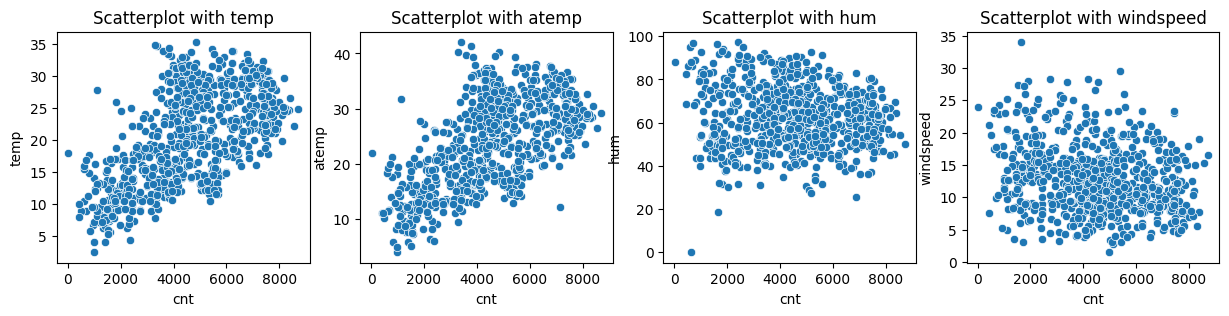

In [8]:
fig, axes = plt.subplots(1, len(numerical_columns), figsize=(15, 3))
for i, col in enumerate(numerical_columns):
    sns.scatterplot(data=df, x=target, y=col, ax=axes[i])
    axes[i].set_title("Scatterplot with " + col)
plt.show()

- Relationship with `temp` and `atemp` for target variable seems linear
- `hum` and `windspeed` have a rather vague relationship with target variable

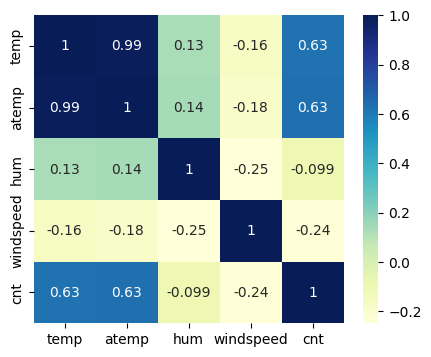

In [9]:
plt.figure(figsize = (5, 4))
sns.heatmap(df[numerical_columns + [target]].corr(), annot = True, cmap="YlGnBu")
plt.show()

- `temp` and `atemp` seem to have high correlation with `target` variable
- `temp` and `atemp` have high correlation between themselves

#### Visualising Categorical Variables


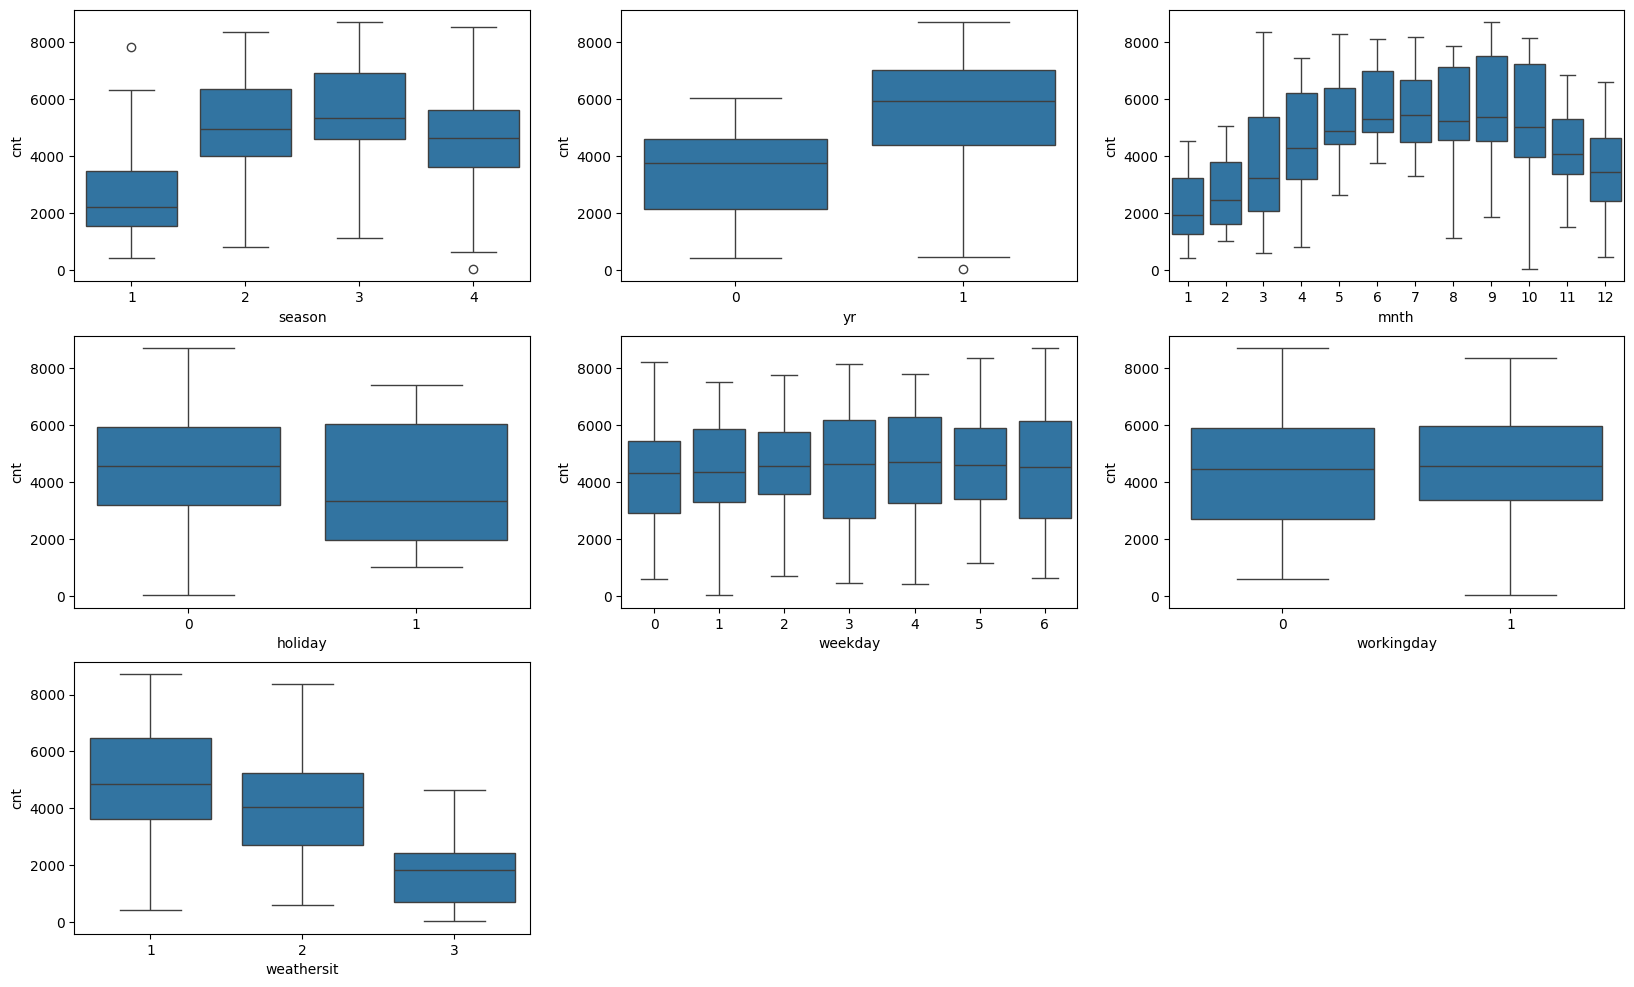

In [10]:
plt.figure(figsize=(20, 12))
for i, col in enumerate(categorical_columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df, y=target, x=col)
plt.show()

- `season 3 [fall]` and `season 2 [summer]` seem to have higher count
- `year 2019` say much more count than `year 2018`, which tends to show year on year increase
- `clear weather` has much higher count compared to others
- months 8, 9, 10 seem to have higher count than others
- count doesnt seem to be impacted that much with changing `weekday` values
- `workingday` value is also doesnt seem to have a very obvious impact


## Step 3: Data Preparation
### Dummy Variables

In [11]:
# For each categorical non binary column, we want to create dummy variables
non_binary_columns = ['season', 'mnth', 'weekday', 'weathersit']
dummy_col_dfs = []
for col in non_binary_columns:
    dummy_col_df = pd.get_dummies(df[col], drop_first=True, prefix=col)
    dummy_col_dfs.append(dummy_col_df)
dummy_col_dfs

[     season_2  season_3  season_4
 0       False     False     False
 1       False     False     False
 2       False     False     False
 3       False     False     False
 4       False     False     False
 ..        ...       ...       ...
 725     False     False     False
 726     False     False     False
 727     False     False     False
 728     False     False     False
 729     False     False     False
 
 [730 rows x 3 columns],
      mnth_2  mnth_3  mnth_4  mnth_5  mnth_6  mnth_7  mnth_8  mnth_9  mnth_10  \
 0     False   False   False   False   False   False   False   False    False   
 1     False   False   False   False   False   False   False   False    False   
 2     False   False   False   False   False   False   False   False    False   
 3     False   False   False   False   False   False   False   False    False   
 4     False   False   False   False   False   False   False   False    False   
 ..      ...     ...     ...     ...     ...     ...     ...     ..

In [12]:
df = pd.concat([df] + dummy_col_dfs, axis=1)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,...,False,False,False,False,False,False,False,True,True,False
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,...,False,False,False,False,False,False,False,False,True,False
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,...,False,False,True,False,False,False,False,False,False,False
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,...,False,False,False,True,False,False,False,False,False,False
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,...,False,False,False,False,True,False,False,False,False,False


- We have now added all the dummy columns to our dataset
- We will now drop all the non binary columns and extra columns which are not relevant for our model

#### Dropping extra columns

In [13]:
df.drop(non_binary_columns, axis=1, inplace=True)
df.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,1,01-01-2018,0,0,0,14.110847,18.18125,80.5833,10.749882,331,...,False,False,False,False,False,False,False,True,True,False
1,2,02-01-2018,0,0,0,14.902598,17.68695,69.6087,16.652113,131,...,False,False,False,False,False,False,False,False,True,False
2,3,03-01-2018,0,0,1,8.050924,9.47025,43.7273,16.636703,120,...,False,False,True,False,False,False,False,False,False,False
3,4,04-01-2018,0,0,1,8.200000,10.60610,59.0435,10.739832,108,...,False,False,False,True,False,False,False,False,False,False
4,5,05-01-2018,0,0,1,9.305237,11.46350,43.6957,12.522300,82,...,False,False,False,False,True,False,False,False,False,False


In [14]:
df.drop(extra, axis=1, inplace=True)
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,False,False,...,False,False,False,False,False,False,False,True,True,False
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,False,False,...,False,False,False,False,False,False,False,False,True,False
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,False,False,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,False,False,...,False,False,False,True,False,False,False,False,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,False,False,...,False,False,False,False,True,False,False,False,False,False


## Step 4: Splitting the Data into Training and Testing Sets

In [15]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Rescaling numerical columns

In [16]:
scaler = MinMaxScaler()

In [17]:
df_train[numerical_columns] = scaler.fit_transform(df_train[numerical_columns])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,7534,False,False,...,False,False,False,True,False,False,False,False,False,False
576,1,0,1,0.815169,0.766351,0.725633,0.264686,7216,False,True,...,False,False,False,True,False,False,False,False,False,False
426,1,0,0,0.442393,0.438975,0.640189,0.255342,4066,False,False,...,False,False,False,False,False,False,False,True,True,False
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1796,False,False,...,False,True,False,False,False,False,False,False,False,False
482,1,0,0,0.395666,0.391735,0.504508,0.188475,4220,True,False,...,False,False,False,False,False,False,False,True,True,False


In [18]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,4486.382353
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,1952.158739
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,3120.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,4530.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,5973.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000


#### Dividing into X and y for building model

In [19]:
y_train = df_train.pop(target)
X_train = df_train.astype(float)

## Step 5: Building a linear model
#### Statsmodel with all variables

In [20]:
X_train_lm = sm.add_constant(X_train)
X_train_lm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         510 non-null    float64
 1   yr            510 non-null    float64
 2   holiday       510 non-null    float64
 3   workingday    510 non-null    float64
 4   temp          510 non-null    float64
 5   atemp         510 non-null    float64
 6   hum           510 non-null    float64
 7   windspeed     510 non-null    float64
 8   season_2      510 non-null    float64
 9   season_3      510 non-null    float64
 10  season_4      510 non-null    float64
 11  mnth_2        510 non-null    float64
 12  mnth_3        510 non-null    float64
 13  mnth_4        510 non-null    float64
 14  mnth_5        510 non-null    float64
 15  mnth_6        510 non-null    float64
 16  mnth_7        510 non-null    float64
 17  mnth_8        510 non-null    float64
 18  mnth_9        510 non-null    floa

In [21]:
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const           1548.468620
yr              2018.348421
holiday         -368.484968
workingday       381.398203
temp            3488.288457
atemp            440.054334
hum            -1319.550957
windspeed      -1602.699325
season_2         754.429310
season_3         422.258575
season_4        1338.285790
mnth_2           264.145195
mnth_3           555.014234
mnth_4           543.819235
mnth_5           758.434050
mnth_6           529.012073
mnth_7           202.426397
mnth_8           683.551903
mnth_9          1254.874740
mnth_10          610.703467
mnth_11          180.644046
mnth_12          147.709275
weekday_1        -86.452979
weekday_2        -67.385195
weekday_3         50.612804
weekday_4         15.696644
weekday_5        100.441961
weekday_6        473.997505
weathersit_2    -530.474594
weathersit_3   -2231.211080
dtype: float64

In [22]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          8.42e-181
Time:                        19:36:45   Log-Likelihood:                -4097.8
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     481   BIC:                             8376.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1548.4686    264.254      5.860   

- As per the summary, there are many insignficant columns
- High R-squared value (85%) and very low probability of F-statistic suggests that linear model is able to fit properly

- Lets try RFE to first shortlist 15 most important columns and then go through remaining columns manually to arrive at a good model
#### Sklearn model with RFE

In [23]:
sk_lm = LinearRegression()
sk_lm.fit(X_train, y_train)

rfe = RFE(sk_lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [24]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 7),
 ('season_4', True, 1),
 ('mnth_2', False, 12),
 ('mnth_3', False, 8),
 ('mnth_4', False, 10),
 ('mnth_5', False, 9),
 ('mnth_6', False, 11),
 ('mnth_7', False, 13),
 ('mnth_8', False, 4),
 ('mnth_9', True, 1),
 ('mnth_10', False, 5),
 ('mnth_11', False, 14),
 ('mnth_12', False, 15),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 3),
 ('weathersit_2', False, 2),
 ('weathersit_3', True, 1)]

In [25]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_4', 'mnth_9', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weathersit_3'],
      dtype='object')

In [26]:
X_train.columns[~rfe.support_]


Index(['atemp', 'season_3', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_6',
       'weathersit_2'],
      dtype='object')

In [27]:
X_train_rfe = X_train[col]
X_train_rfe.shape

(510, 15)

#### Statsmodel with RFE selected features
- We can now look at the significance of the 15 features selected by RFE

In [28]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.3
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          5.30e-181
Time:                        19:36:47   Log-Likelihood:                -4133.3
No. Observations:                 510   AIC:                             8297.
Df Residuals:                     495   BIC:                             8360.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2263.7507    234.514      9.653   

#### Manually analysing the remaining columns

- `weekday_5` has very low significance, we can drop it safely

In [29]:
X_train_rfe = X_train_rfe.drop(["weekday_5"], axis=1)
lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.3
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          5.30e-181
Time:                        19:36:48   Log-Likelihood:                -4133.3
No. Observations:                 510   AIC:                             8297.
Df Residuals:                     495   BIC:                             8360.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2263.7507    234.514      9.653   

- `weekday_3` has very low significance, we can drop it safely too

In [30]:
X_train_rfe = X_train_rfe.drop(["weekday_3"], axis=1)
lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     188.1
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          3.80e-182
Time:                        19:36:49   Log-Likelihood:                -4133.4
No. Observations:                 510   AIC:                             8295.
Df Residuals:                     496   BIC:                             8354.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2264.0567    234.256      9.665   

- `weekday_4` can be dropped too as very low significance

In [31]:
X_train_rfe = X_train_rfe.drop(["weekday_4"], axis=1)
lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     204.2
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          2.69e-183
Time:                        19:36:49   Log-Likelihood:                -4133.4
No. Observations:                 510   AIC:                             8293.
Df Residuals:                     497   BIC:                             8348.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2261.9193    233.877      9.671   

- we can see `weekday_2` still has very low significance, lets drop it

In [32]:
X_train_rfe = X_train_rfe.drop(["weekday_2"], axis=1)
lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     222.7
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          2.60e-184
Time:                        19:36:50   Log-Likelihood:                -4133.8
No. Observations:                 510   AIC:                             8292.
Df Residuals:                     498   BIC:                             8342.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2268.7345    233.700      9.708   

- `weekday_1` still is very low signicance so we will drop it
- it seems day of the week doesnt have a significant impact on the result which was also sort of visible from our boxplot

In [33]:
X_train_rfe = X_train_rfe.drop(["weekday_1"], axis=1)
lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     245.1
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          2.32e-185
Time:                        19:36:50   Log-Likelihood:                -4134.2
No. Observations:                 510   AIC:                             8290.
Df Residuals:                     499   BIC:                             8337.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2274.5540    233.535      9.740   

- lets drop `workingday` as still has low enough significance

In [34]:
X_train_rfe = X_train_rfe.drop(["workingday"], axis=1)
lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.1
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          5.16e-186
Time:                        19:36:51   Log-Likelihood:                -4135.5
No. Observations:                 510   AIC:                             8291.
Df Residuals:                     500   BIC:                             8333.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2359.8859    228.006     10.350   

- significance of all the remaining variables seem very high now, so we can check VIF to find if there are `multi collinearity` issues

#### Multi Collinearity check

In [35]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,40.19
4,hum,1.25
7,season_4,1.24
3,temp,1.20
6,season_2,1.19
5,windspeed,1.16
8,mnth_9,1.11
9,weathersit_3,1.11
1,yr,1.02
2,holiday,1.01


- other than `const`, VIF is low for every other column
- we will keep `const` regardless, as it is not an actual data point which is being predicted by other columns
- removing `const` will mean that our model will always pass through origin which will introduce bias

## Step 6 : Residual analysis of training data

In [36]:
y_train_predicted = lm.predict(X_train_rfe)

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Error terms are normally distributed with mean zero

Text(0.5, 0, 'Errors')

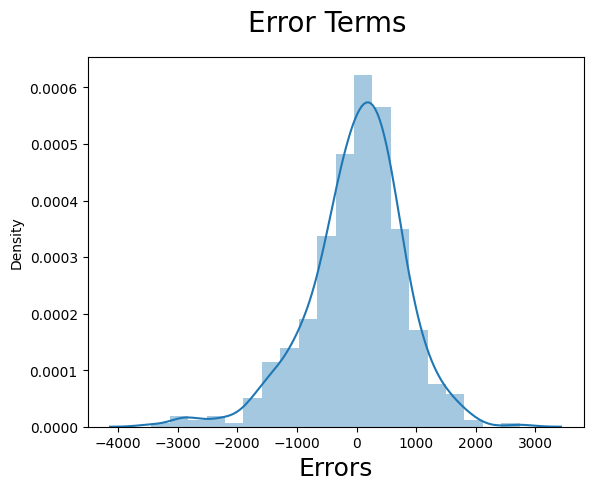

In [38]:
fig = plt.figure()
sns.distplot((y_train - y_train_predicted), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

#### Homoscedasticity (Error terms have constant variance)

Text(0, 0.5, 'Residuals')

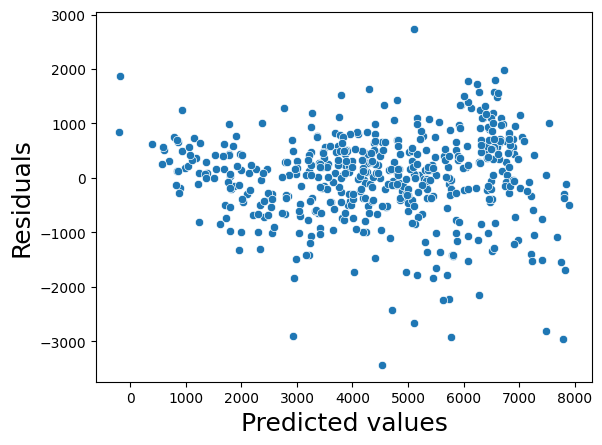

In [39]:
sns.scatterplot(y=(y_train - y_train_predicted), x=y_train_predicted)
fig.suptitle('Error Terms Distribution', fontsize = 20)
plt.xlabel('Predicted values', fontsize = 18)
plt.ylabel('Residuals', fontsize = 18)

In [40]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_4', 'mnth_9', 'weathersit_3'],
      dtype='object')

In [41]:
X_train_rfe.describe()

,const,yr,holiday,temp,hum,windspeed,season_2,season_4,mnth_9,weathersit_3
count,510.0,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,1.0,0.507843,0.025490,0.537262,0.650369,0.320768,0.245098,0.24902,0.080392,0.029412
std,0.0,0.500429,0.157763,0.225844,0.145882,0.169797,0.430568,0.43287,0.272166,0.169124
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.339853,0.538643,0.199179,0.000000,0.00000,0.000000,0.000000
50%,1.0,1.000000,0.000000,0.540519,0.653714,0.296763,0.000000,0.00000,0.000000,0.000000
75%,1.0,1.000000,0.000000,0.735215,0.754830,0.414447,0.000000,0.00000,0.000000,0.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## Step 7 : Making prediction

In [42]:
df_test[numerical_columns] = scaler.transform(df_test[numerical_columns])

In [43]:
y_test = df_test.pop(target)
X_test = df_test

In [44]:
X_test = sm.add_constant(X_test)
X_test_model = X_test[X_train_rfe.columns]
X_test_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   holiday       219 non-null    int64  
 3   temp          219 non-null    float64
 4   hum           219 non-null    float64
 5   windspeed     219 non-null    float64
 6   season_2      219 non-null    bool   
 7   season_4      219 non-null    bool   
 8   mnth_9        219 non-null    bool   
 9   weathersit_3  219 non-null    bool   
dtypes: bool(4), float64(4), int64(2)
memory usage: 12.8 KB


In [45]:
y_predict = lm.predict(X_test_model)

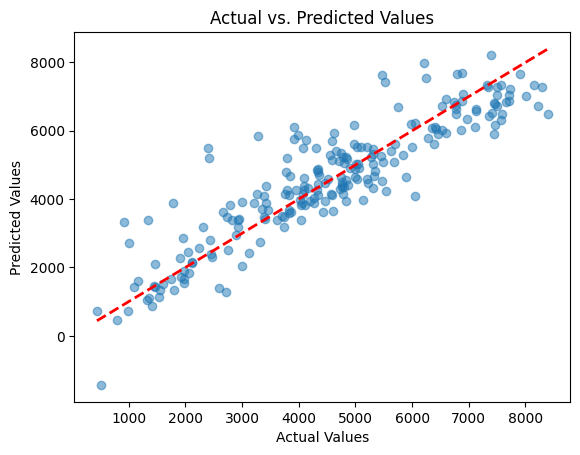

In [46]:
fig = plt.figure()
plt.scatter(y_test, y_predict, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
# Plotting the 45-degree line for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.show() 

- predicted vs actual value show that predicted values are close to actual values

In [47]:
r2_score(y_true=y_train, y_pred=lm.predict(X_train_rfe))

0.8299345905646582

In [48]:
r2_score(y_true=y_test, y_pred=lm.predict(X_test_model))

0.8034058827110346

In [49]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.1
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          5.16e-186
Time:                        19:36:58   Log-Likelihood:                -4135.5
No. Observations:                 510   AIC:                             8291.
Df Residuals:                     500   BIC:                             8333.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2359.8859    228.006     10.350   

- Model on train dataset had an R-squared value of 83% whereas it had R-squared value of 80.3% on the test dataset
- Statistical linear model is able to predict well here
- All the assumptions of linear regression also were valid